In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [3]:
X

array([[ 6.9908042 , -0.49346078],
       [ 4.74533405,  0.99593864],
       [ 8.60557132,  0.41671272],
       ...,
       [ 8.01832889,  1.35644151],
       [ 8.96095164,  2.6598229 ],
       [ 9.29234291,  0.04881016]])

In [4]:
y

array([1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 2,
       0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 1,
       2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 2, 0,
       0, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 1,
       2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2,
       1, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 2, 2, 1, 0,
       2, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0,
       1, 2, 1, 2, 2, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 0, 2, 2, 0, 1, 0, 2, 0,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 1, 2, 0,
       1, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0,
       0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 0, 1, 2, 0, 1,

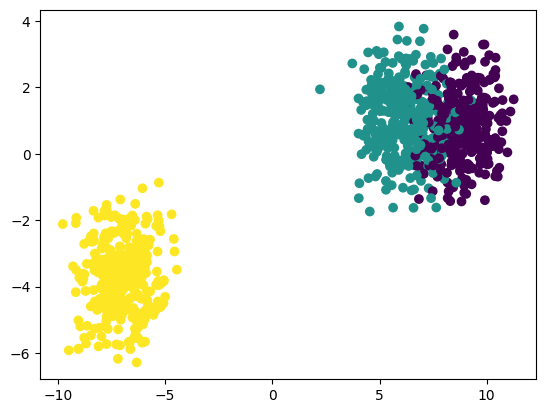

In [5]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [6]:
## standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.cluster import KMeans

In [10]:
## elbow method toselect k value
import warnings
warnings.filterwarnings('ignore')
wcss = []
for k in range(1, 11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[1339.9999999999989,
 154.7260854670199,
 100.00744010123742,
 86.32140773063594,
 59.55085549384065,
 50.48162974917399,
 41.72105613795205,
 41.54953757090682,
 32.73666877095693,
 30.63473826236984]

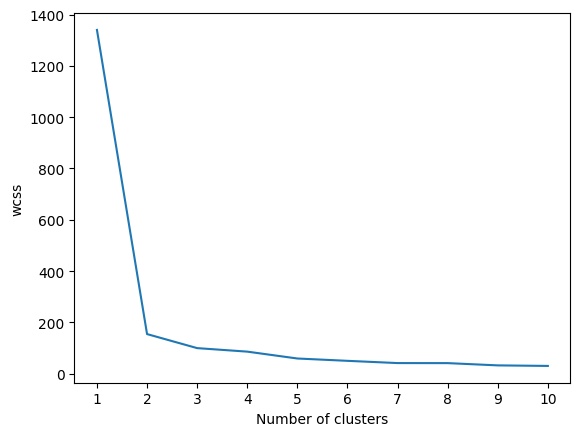

In [12]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++')


In [14]:
kmeans.fit_predict(X_train_scaled)

array([1, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2,
       1, 1, 2, 1, 2, 1, 1, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 0,
       0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2,
       2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 0,
       1, 1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0,
       1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 0,
       1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 2,
       1, 1, 0, 2, 1, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2,
       0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1, 2,

In [15]:
y_pred = kmeans.predict(X_test_scaled)

In [16]:
y_pred

array([0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1,
       1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0,
       1, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 1, 0, 2, 1, 2, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 0, 1,
       0, 0, 0, 2, 0, 2, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 2, 1, 2, 0, 2,
       1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0,
       1, 2, 1, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2,
       0, 2, 0, 1, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 0, 2, 1, 2,
       1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 2, 0,

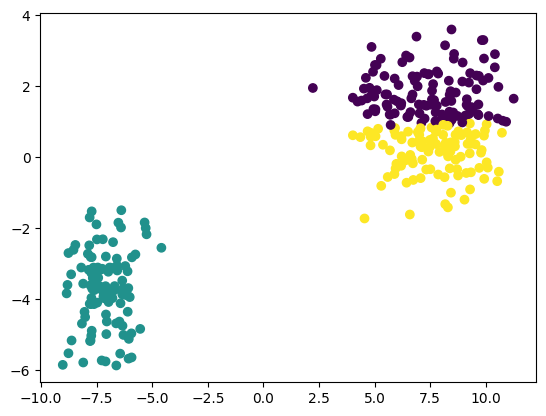

In [17]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)
plt.show()

In [18]:
## validating the kvalue

In [19]:
## knee locator
## silhoutee scoring

In [20]:
## knee locator
!pip install kneed

In [21]:
from kneed import KneeLocator

In [22]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [23]:
kl.elbow

2

In [24]:
## silhoutte scoring
from sklearn.metrics import silhouette_score

In [25]:
silhoutte_coefficients=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k, init='k-means++')
    kmean.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmean.labels_)
    silhoutte_coefficients.append(score)

In [26]:
silhoutte_coefficients

[0.7907715911348666,
 0.5485564778647658,
 0.4341731373146907,
 0.3745433027110145,
 0.3880622134229416,
 0.3572456692504418,
 0.3731537989493578,
 0.3779402274486499,
 0.3871464428626246]

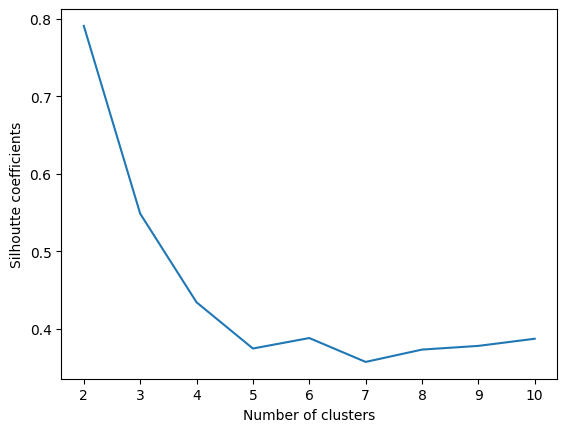

In [27]:
plt.plot(range(2,11), silhoutte_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte coefficients')
plt.show()